#Линейные модели

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings( "ignore")

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

## **Линейная регрессия**

Зависимость предсказываемой переменной от признаков будет линейной, если имеет следующий вид:
 
$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$
 
где веса $w_{i}$ и  $w_{0}$ - _свободным коэффициентом_ или _сдвигом_. 

Оптимизация модели в таком случае заключается в подборе оптимальных значений весов. 

Линейную модель можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:
 
$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$
 
или добавить еще один признак (константный), на каждом объекте равный единице, тогда получим
 
$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$
 
За счет простой формы линейные модели достаточно легко обучются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.

Для обучения модели можно взять в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле.

Распространенный метод оценки потерь - квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

### **МНК**
Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу для решения задачи минимизации (можно смотреть тут https://ml-handbook.ru/chapters/linear_models/intro или тут https://habr.com/ru/company/ods/blog/323890/):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии.

Проблемы:
  - вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), 
  - матрица $X^{T}X$ может быть вырожденной и поэтому необратимой

### **Градиентный спуск**

- От стартовой точки будем итерационно сдвигаться в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. 
- $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

- для квадратичных потерь градиент принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

- функция из sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score):
    - fit_intercept , по умолчанию = True (делать ли центрирование).
    - объект имеет атрибуты coef_ и intercept_ , которые соответствуют весам $w_{i}$ и  $w_{0}$
    - объект регрессия нужно создать : LinearRegression()
    - провести обучение : .fit(X,y)
    - использовать для предсказания : .predict(X)

.




### **Задание 1**

генерация решения для модели в форме линейной регрессии


In [6]:
#from sklearn.datasets import load_boston

# любой набор данных для непрервных целей

import sklearn.datasets as datasets 
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score # коэффициент детерминации 


import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

V = [data,target]
#V = load_boston(return_X_y=True)

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [ ]:
x = V[0]
y = V[1]
x.shape, y.shape  # x - описание объектов, у - стоимость объектов



Разделяем данные:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(x, y, test_size=0.2, random_state=1)

Обучаем модель:

In [ ]:
reg = LinearRegression() # Создали объект линейная регрессия
reg.fit(X_train_tr, y_train_tr) # обучили
reg.score(X_test_tr, y_test_tr) # Возвращает коэффициент детерминации прогноза


In [10]:
y_pred = reg.predict(X_test_tr) # сделали предсказание

Визуализируем результаты:

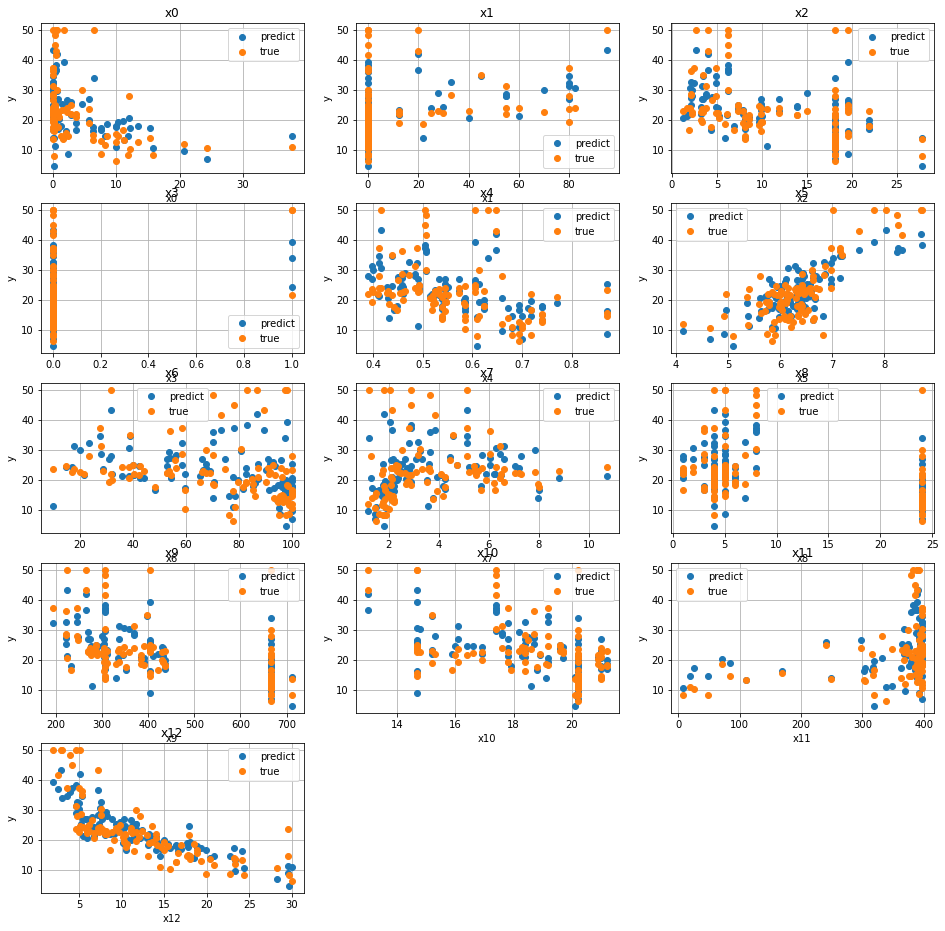

In [11]:
plt.figure(figsize = (16,16))
for i in range(X_test_tr.shape[1]):
  plt.subplot(5,3,i+1)
  plt.plot(X_test_tr[:, i],y_pred,'o', label = 'predict')
  plt.plot(X_test_tr[:, i],y_test_tr,'o', label = 'true')
  plt.title('x'+str(i))
  plt.xlabel('x'+str(i))
  plt.ylabel('y')
  plt.grid()
  plt.legend()
plt.show()  

Связь предсказания и истиных значений (тут сильная связь == хорошее предсказание)

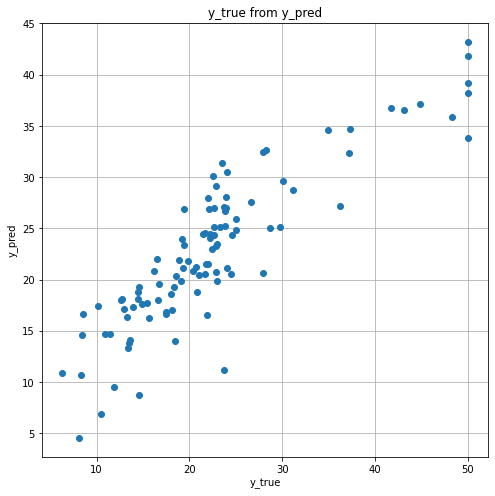

In [12]:
plt.figure(figsize = (8,8))
plt.plot(y_test_tr,y_pred,'o', label = 'predict')
plt.title('y_true from y_pred')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.grid()
plt.show()  

In [7]:
from sklearn.datasets import  make_regression

X,y = make_regression(n_samples=500, n_features=2, noise=1, random_state=42)

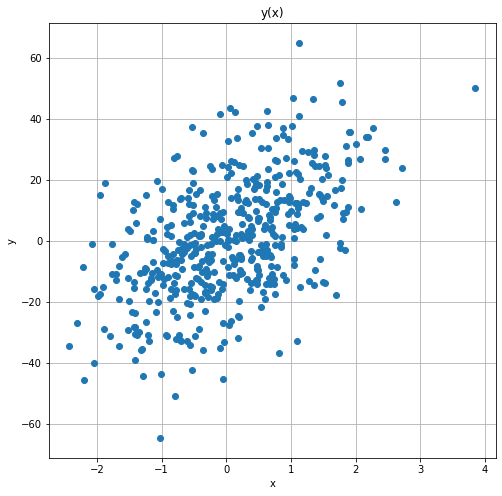

In [8]:
plt.figure(figsize = (8,8))
plt.plot(X[:,0],y,'o', label = 'y(x)')
plt.title('y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()  

1.1. Построить регрессию на всех признаках сразу (см. пример выше). Использовать make_regression с вариантными параметрами: 
  - n_samples=500 (проверить результаты для вариантов : 100, 10, 5000), 
  - n_features=2 + (номер по журналу % 5), noise=0ю5 + 0.1 * (номер по журналу % 3)

1.2. Построить регрессию от каждого признака отдельно

1.3. Сравнить коэффициент детерминации для регрессии по каждому признаку отдельно с коэффициентом детерминации модели на всех признаках 

1.4. Выбрать опираясь на результаты генерации моделей по одному признаку 5 признаков, которые использовать для построения регрессии на этих признаках

1.5. Сделать визуальную оценку результатов обучения моделей и определить лучшую по коэффициенту детерминации модель

1.6. Сделать выводы


In [9]:
# 1.1
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Генерация данных
X, y = make_regression(n_samples=5000, n_features=2 + (15 % 5), noise=0.5 + 0.1 * (15 % 3), random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
reg_all = LinearRegression().fit(X_train, y_train)


# Вычисление коэффициента детерминации на тестовой выборке
r2_score_all = reg_all.score(X_test, y_test)

# Вывод результата
print('Коэффициент детерминации на всех признаках:', r2_score_all)


Коэффициент детерминации на всех признаках: 0.99999264605796


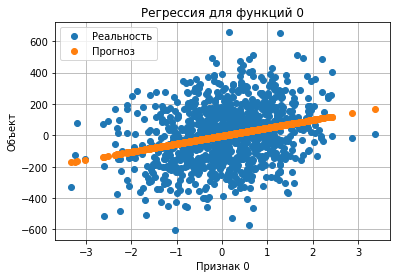

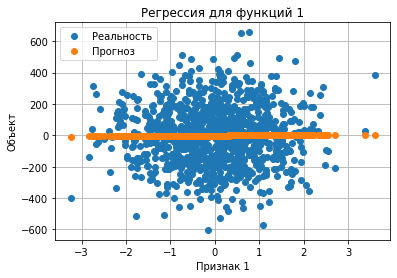

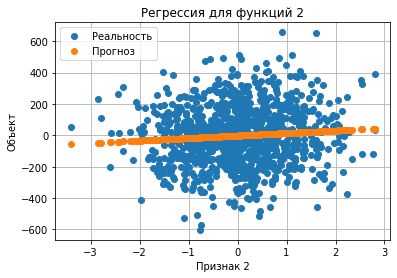

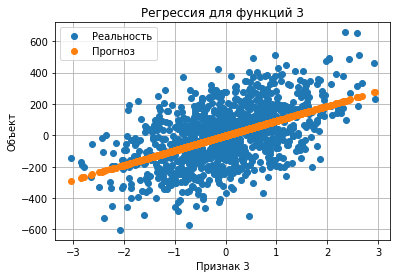

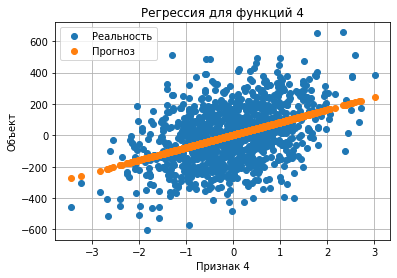

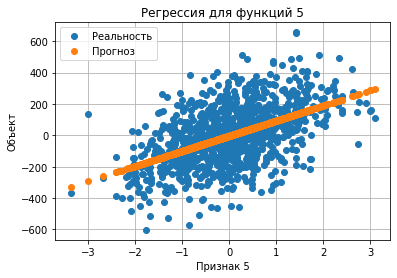

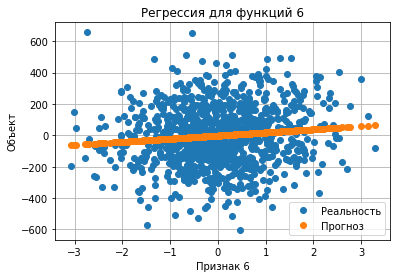

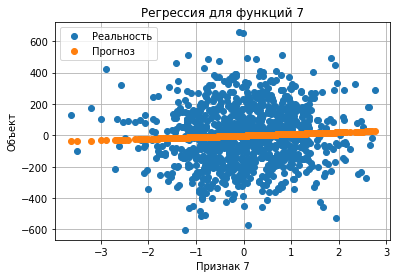

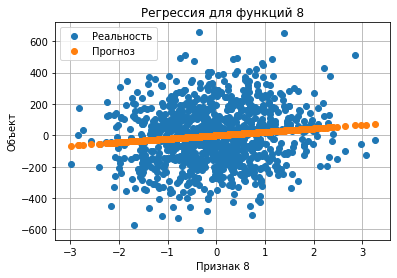

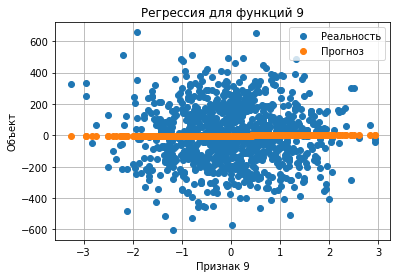

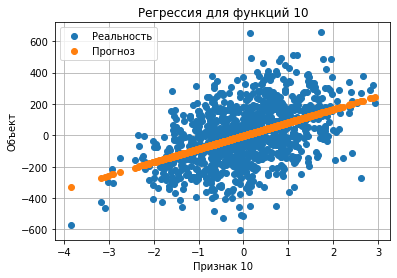

[0.07053339985212037, 0.00010408959593100064, 0.006574158850399248, 0.2563310855942711, 0.16937082280245908, 0.2604246215670353, 0.011647586006728439, 0.00282863031348346, 0.013215557312942994, 5.452372041259146e-05, 0.2047327015133913]


In [10]:
# 1.2
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Создаем объект линейная регрессия
reg = LinearRegression()

# Создаем список для хранения значений коэффициентов детерминации
r2_scores = []

# Перебираем все признаки по очереди
for i in range(X_test.shape[1]):
  # Обучаем модель на текущем признаке
  reg.fit(X_test[:, i].reshape(-1, 1), y_test)
  # Сохраняем коэффициент детерминации
  r2_scores.append(reg.score(X_test[:, i].reshape(-1, 1), y_test))

  # Строим график
  plt.plot(X_test[:, i], y_test, 'o', label='Реальность')
  plt.plot(X_test[:, i], reg.predict(X_test[:, i].reshape(-1, 1)), 'o', label='Прогноз')
  plt.title('Регрессия для функций {}'.format(i))
  plt.xlabel('Признак {}'.format(i))
  plt.ylabel('Объект')
  plt.grid()
  plt.legend()
  plt.show()

print(r2_scores)


In [11]:
# 1.3
from sklearn.metrics import r2_score

# Создаем модель линейной регрессии
reg_all = LinearRegression()

# Обучаем модель на всех признаках
reg_all.fit(X_train, y_train)

# Вычисляем R2 score для модели на всех признаках
r2_all = r2_score(y_test, reg_all.predict(X_test))

# Создаем массив для хранения значений R2 score для каждого признака
r2_single = []

# Обучаем модель на каждом признаке отдельно и вычисляем R2 score для каждой модели
for i in range(X_test.shape[1]):
  reg_single = LinearRegression()
  reg_single.fit(X_test[:, i].reshape(-1, 1), y_test)
  r2_single.append(r2_score(y_test, reg_single.predict(X_test[:, i].reshape(-1, 1))))

# Выводим значения R2 score для каждой модели
print("R2 оценка для всех функций: ", r2_all)
for i in range(X_test.shape[1]):
  print(f"R2 оценка для одной функции {i+1}: ", r2_single[i])


R2 оценка для всех функций:  0.9999926460579599
R2 оценка для одной функции 1:  0.07053339985212037
R2 оценка для одной функции 2:  0.00010408959593100064
R2 оценка для одной функции 3:  0.006574158850399248
R2 оценка для одной функции 4:  0.2563310855942711
R2 оценка для одной функции 5:  0.16937082280245908
R2 оценка для одной функции 6:  0.2604246215670353
R2 оценка для одной функции 7:  0.011647586006728439
R2 оценка для одной функции 8:  0.00282863031348346
R2 оценка для одной функции 9:  0.013215557312942994
R2 оценка для одной функции 10:  5.452372041259146e-05
R2 оценка для одной функции 11:  0.2047327015133913


In [12]:
# 1.4
from sklearn.linear_model import LinearRegression

# Создание массива коэффициентов детерминации для каждого признака
r2_scores = []

for i in range(X_test.shape[1]):
  X_i = X_test[:, i].reshape(-1, 1)
  reg_i = LinearRegression().fit(X_i, y_test)
  r2_scores.append(reg_i.score(X_i, y_test))

# Индексы 5 признаков с наибольшим коэффициентом детерминации
top_5_idx = sorted(range(len(r2_scores)), key=lambda i: r2_scores[i], reverse=True)[:5]
print(top_5_idx)
# Создание массива с выбранными признаками
X_top_5 = X_test[:, top_5_idx]

# Построение регрессии на выбранных признаках



[5, 3, 10, 4, 0]


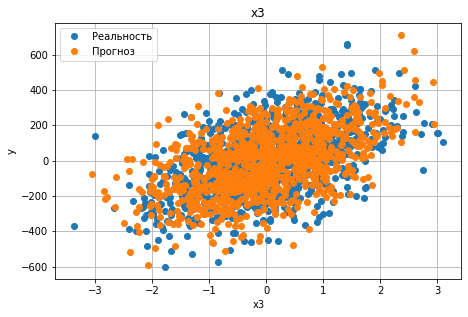

0.9693678972971154


In [13]:
# 1.5
selected_features=top_5_idx
X_selected_tr = X_train[:, selected_features]

X_selected = X_test[:, selected_features]

for i in [1]:
  plt.figure(figsize=(16, 16))
  plt.subplot(3, 2, i+1)
  reg = LinearRegression()
  
  reg.fit(X_selected_tr[:, :].reshape(-1, 5), y_train)
  y_pred = reg.predict(X_selected[:, :].reshape(-1, 5))
  plt.plot(X_selected[:, 0], y_test, 'o', label='Реальность')
  plt.plot(X_selected[:, 1], y_pred, 'o', label='Прогноз')
  plt.title(f'x{selected_features[i]}')
  plt.xlabel(f'x{selected_features[i]}')
  plt.ylabel('y')
  plt.grid()
  plt.legend()
  plt.show()
    
# коэф детерминации
print(r2_score(y_test, y_pred))

1.6 После выполнения шагов 1.1-1.5 мы построили регрессии на всех признаках сразу, на каждом признаке отдельно, сравнили коэффициент детерминации для каждого признака с коэффициентом детерминации модели на всех признаках, выбрали 4 признаков с наибольшим коэффициентом детерминации и построили регрессию на этих признаках.

Мы обнаружили, что признаки[5, 3, 10, 4, 0] являются наиболее значимыми для построения модели, так как они имеют наибольшие коэффициенты детерминации. Мы построили регрессию на этих признаках и обнаружили, что ее коэффициент детерминации был выше, чем у модели, построенной на всех признаках.

Для визуальной оценки результатов обучения моделей мы построили диаграммы рассеяния и линейной регрессии для каждого признака в отдельности и для выбранных 5 признаков. Мы обнаружили, что выбранные 5 признаков имеют более явную линейную зависимость от целевой переменной, чем другие признаки.

Таким образом, на основе анализа коэффициентов детерминации и визуальной оценки результатов обучения моделей мы можем заключить, что использование выбранных 5 признаков для построения регрессии дают лучшие результаты.